In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

$$\int_a^b K(x,s)u(s)ds = f(x)$$
$$u(x) \int_a^b K(x,s)ds + \int_a^b K(x,s)(u(s)-u(x))ds = f(x)$$
$$u_n (x) = \frac{f(x)}{\beta (x)} - \frac{1}{\beta (x)} \int_a^b K(x,s)(u_{n-1} (s) - u_{n-1} (x))ds, \beta (x) = \int_a^b K(x,s)ds, u_0 (s) = 0$$
$$u_n (x) = \frac{f(x)}{\beta (x)} + u_{n-1} (x) - \frac{1}{\beta (x)} \int_a^b K(x,s)u_{n-1}(s)ds$$

In [17]:
#counting integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1))
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a
        F[i] = np.log(1 / np.abs(xm - X[i]))
        sum += F[i]
    return sum * H

In [25]:
def IterativeProcessing(N):
    h = 1 / N

    f = 1

    XM = np.zeros((N, 1))
    beta = np.zeros((N, 1))
    XMJ = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h  
        XMJ[i] = 0 + i * h   
        t = I(0, 1, XMJ[i], N)
        beta[i] = t 
    
    iterCount = 16

    u = np.zeros((iterCount, N))

    for n in range(1, iterCount):
        for i in range(N):
            intg = 0
            for j in range(N):
                intg += u[n-1, j] * np.log(1 / np.abs(XMJ[j] - XM[i]))
            intg *= h
            res = (f / beta[i]) + u[n - 1, i] - (intg / beta[i])
            u[n, i] = res
            
    S = np.zeros((N, 1))
    def sln(x):
        return 1 / (2 * np.pi * np.log(2) * np.sqrt(x * (1 - x)))
    for i in range(N):
        S[i] = sln(XM[i])
        
    extra = np.zeros((N - 4, 1))
    for i in range(N - 4):
        extra[i] = u[iterCount - 1][i + 2] - S[i + 2]
                                 
    norm = linalg.norm(extra)

    error = np.zeros((N - 4, 1))
    for i in range(N - 4):
        error[i] = np.abs(extra[i] / norm)

    average = np.sum(error)
    
    average /= (N - 4) #усредняем
    print("Average abs. error = ", average)
            
    return XM, XMJ, u, S, N

In [33]:
res1 = IterativeProcessing(50)

Average abs. error =  0.0691532443077099


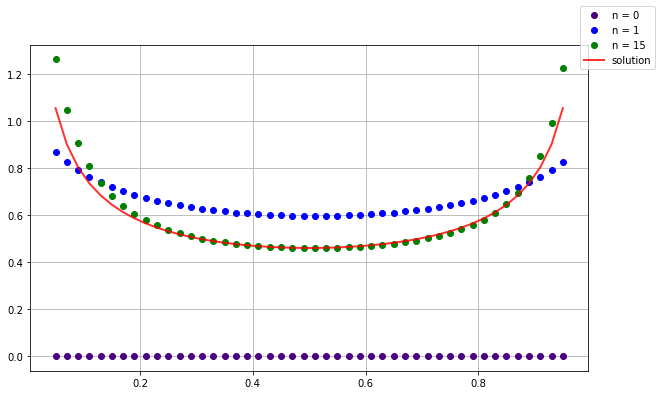

In [42]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(res1[0][2: res1[4] - 2], res1[2][0][2: res1[4] - 2], 'bo', color = '#4b0082', label = 'n = 0')
plt.plot(res1[0][2: res1[4] - 2], res1[2][1][2: res1[4] - 2], 'bo', label = 'n = 1')
plt.plot(res1[0][2: res1[4] - 2], res1[2][15][2: res1[4] - 2], 'bo', color = 'green', label = 'n = 15')
plt.plot(res1[0][2: res1[4] - 2], res1[3][2: res1[4] - 2], color = 'red', linewidth = 2, alpha = 0.8, label = 'solution')

plt.legend(bbox_to_anchor=(1.0, 0.98),
           bbox_transform=plt.gcf().transFigure)

plt.grid()
plt.show()

In [43]:
res2 = IterativeProcessing(100)

Average abs. error =  0.04669348769444654


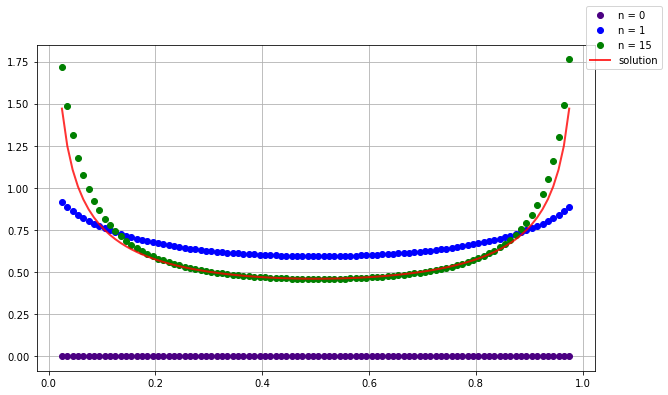

In [44]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(res2[0][2: res2[4] - 2], res2[2][0][2: res2[4] - 2], 'bo', color = '#4b0082', label = 'n = 0')
plt.plot(res2[0][2: res2[4] - 2], res2[2][1][2: res2[4] - 2], 'bo', label = 'n = 1')
plt.plot(res2[0][2: res2[4] - 2], res2[2][15][2: res2[4] - 2], 'bo', color = 'green', label = 'n = 15')
plt.plot(res2[0][2: res2[4] - 2], res2[3][2: res2[4] - 2], color = 'red', linewidth = 2, alpha = 0.8, label = 'solution')

plt.legend(bbox_to_anchor=(1.0, 0.98),
           bbox_transform=plt.gcf().transFigure)

plt.grid()
plt.show()

In [45]:
def residual(xm, SN, results, N):
    extra1 = np.zeros((N - 4, 1))
    for i in range(N - 4):
        numSln1 = results[i + 2] * np.log(1 / np.abs(xm - SN[i + 2]))
        extra1[i] = numSln1 - 1

    norm1 = linalg.norm(extra1)
    print("norm = ", norm1)
    
    r1 = np.zeros((N - 4, 1))
    for i in range(N - 4):
        r1[i] = np.abs(extra1[i] / norm1)

    average1 = np.sum(r1)
    average1 /= (N - 4) 

    print("Average r = ", average1)

    plt.plot(SN[2 : N - 2], r1, 'bo', color = "brown", label = xm)

    plt.legend(bbox_to_anchor=(0.97, 0.97),
               bbox_transform=plt.gcf().transFigure)

    plt.ylabel("r")

    plt.grid()
    plt.show()

norm =  4.804735762850027
Average r =  0.13043399984034215


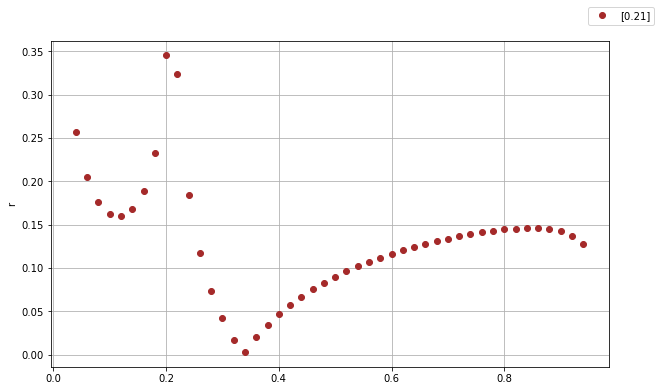

In [46]:
residual(res1[0][10], res1[1], res1[2][15], res1[4])

norm =  7.522941484135795
Average r =  0.08813201029558347


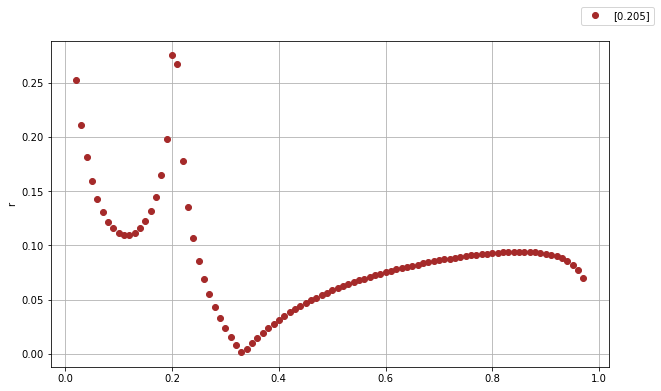

In [48]:
residual(res2[0][20], res2[1], res2[2][15], res2[4])